# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
weather_api_key

'1bce4c0df3b2293dfc66e783f97126f9'

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

In [5]:
#URL and Units
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units ="imperial"

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#Develop query_url
query_url = weather_url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=1bce4c0df3b2293dfc66e783f97126f9&q=saint-georges&units=imperial'

In [9]:
# Run Test
example = city[0]
test_url = query_url + example
test_response = requests.get (test_url).json()
from pprint import pprint
pprint(test_response)

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 12.0564, 'lon': -61.7485},
 'dt': 1614633354,
 'id': 3579925,
 'main': {'feels_like': 299.55,
          'humidity': 57,
          'pressure': 1010,
          'temp': 301.15,
          'temp_max': 301.15,
          'temp_min': 301.15},
 'name': "St. George's",
 'sys': {'country': 'GD',
         'id': 8781,
         'sunrise': 1614594146,
         'sunset': 1614636989,
         'type': 1},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 30, 'speed': 6.69}}


In [10]:
#Test DataFrame
cities_df = pd.DataFrame({"City": cities})
cities_df. head()

,City
0,busselton
1,barrow
2,rikitea
3,lebu
4,tapaua


In [11]:
# begin with Variables 
ncities = 500
city_name = []
c_country = []
date =[]
c_lat =[]
c_lon =[]
temp = []
temp_max =[]
humid =[]
cloud =[]
wind =[]
i = 1


print (f"Beginning Data Retrival")
print ("-------------------------")
# Append List
for city in cities:
    city=city
    query_url = weather_url + "appid=" + weather_api_key + "&units=" + units +"&q=" + city
    w_json =requests.get(query_url).json()
    
    try:      
        city_name.append(w_json ["name"])
        c_country.append(w_json["sys"]["country"])
        date.append(w_json["dt"])
        c_lat.append(w_json["coord"]["lat"])
        c_lon.append(w_json ["coord"]["lon"])
        temp_max.append(w_json["main"]["temp_max"])
        #temp.append(w_json ["main"]["temp"])
        humid.append(w_json ["main"]["humidity"])
        cloud.append(w_json ["clouds"]["all"])
        wind.append(w_json ["wind"]["speed"])
        city_info = w_json["name"]
        print(f"Processing record {i} | {city_info}")
        i+=1
    except (KeyError):
        print(f"City Not found, Skipping.....")
            
        
        


Beginning Data Retrival
-------------------------
Processing record 1 | Busselton
Processing record 2 | Barrow
Processing record 3 | Rikitea
Processing record 4 | Lebu
City Not found, Skipping.....
Processing record 5 | Kolokani
Processing record 6 | Castro
Processing record 7 | Newport
Processing record 8 | Ushuaia
Processing record 9 | Tautira
Processing record 10 | Qaanaaq
Processing record 11 | Mar del Plata
Processing record 12 | Pandan
Processing record 13 | Chamonix
Processing record 14 | Puerto Madryn
Processing record 15 | Tiksi
Processing record 16 | Huhi
City Not found, Skipping.....
Processing record 17 | Cherskiy
Processing record 18 | Esperance
Processing record 19 | Sapouy
Processing record 20 | Mount Isa
Processing record 21 | Yellowknife
Processing record 22 | Vaini
Processing record 23 | Cape Town
Processing record 24 | College
Processing record 25 | Saint George
Processing record 26 | Petersburg
Processing record 27 | Lac-Mégantic
Processing record 28 | Hithadhoo
Pro

Processing record 230 | Hernani
Processing record 231 | Iqaluit
Processing record 232 | Ukiah
Processing record 233 | Oxelösund
Processing record 234 | Lorengau
Processing record 235 | Olafsvik
Processing record 236 | Bud
Processing record 237 | Vanavara
Processing record 238 | Dulce Grande
Processing record 239 | Fremont
Processing record 240 | Alta Floresta
City Not found, Skipping.....
Processing record 241 | Najrān
Processing record 242 | Karpathos
Processing record 243 | Hofn
Processing record 244 | Carutapera
Processing record 245 | Voznesen'ye
Processing record 246 | Sainte-Maxime
Processing record 247 | Labuan
Processing record 248 | Tatarskaya Pishlya
City Not found, Skipping.....
Processing record 249 | Hamilton
Processing record 250 | Kabinda
City Not found, Skipping.....
Processing record 251 | Ordzhonīkīdze
Processing record 252 | Galle
Processing record 253 | Richards Bay
City Not found, Skipping.....
Processing record 254 | Katsuura
Processing record 255 | Liverpool
Proc

Processing record 458 | Deputatsky
Processing record 459 | Tuy Hoa
City Not found, Skipping.....
Processing record 460 | Lufilufi
Processing record 461 | Yarmouth
Processing record 462 | Todos Santos
Processing record 463 | Siemiatycze
Processing record 464 | Faya
City Not found, Skipping.....
Processing record 465 | Nouadhibou
Processing record 466 | Sabla
Processing record 467 | Diffa
Processing record 468 | Yantzaza
Processing record 469 | Tokmak
Processing record 470 | Murgab
Processing record 471 | Rio Grande
Processing record 472 | Sandy Bay
Processing record 473 | Tamiahua
Processing record 474 | Quatre Cocos
Processing record 475 | Garissa
Processing record 476 | Rørvik
Processing record 477 | Suzun
Processing record 478 | Marsala
Processing record 479 | Fomboni
Processing record 480 | Pétionville
Processing record 481 | Kapit
Processing record 482 | Makarov
Processing record 483 | Lehigh Acres
Processing record 484 | Port Hedland
Processing record 485 | Merauke
Processing reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
# Convert to Dataframe
weather_d= {'City Name': city_name,'Country': c_country,'Cloudiness': cloud,'Lat':c_lat,'Long':c_lon,'Humidity':humid,'Windspeed':wind,'Temperature': temp_max}
weather_df =pd.DataFrame(weather_d, columns=('City Name','Country','Cloudiness','Lat','Long','Humidity', 'Windspeed','Temperature'))
weather_df

,City Name,Country,Cloudiness,Lat,Long,Humidity,Windspeed,Temperature
0,Busselton,AU,100,-33.6500,115.3333,88,1.01,64.00
1,Barrow,US,90,71.2906,-156.7887,76,5.75,-20.20
2,Rikitea,PF,37,-23.1203,-134.9692,62,5.39,78.24
3,Lebu,CL,25,-37.6167,-73.6500,78,24.20,64.87
4,Kolokani,ML,100,13.5728,-8.0339,15,8.23,81.81
...,...,...,...,...,...,...,...,...
573,Tiznit Province,MA,56,29.5833,-9.5000,81,5.39,53.35
574,Payo,ID,98,-3.7508,103.6372,96,2.51,73.27
575,Umarkot,PK,0,25.3616,69.7362,13,5.48,66.96
576,Tabou,CI,85,4.4230,-7.3528,84,4.14,78.98


In [14]:
weather_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
#Find out if any city has above 100% humididty
test_humidity = weather_df["Humidity"].describe(include = "all")
print("No cities have over 100% humidity in data")
test_humidity

No cities have over 100% humidity in data


count    578.000000
mean      71.337370
std       21.336668
min       11.000000
25%       60.000000
50%       78.000000
75%       87.000000
max      100.000000
Name: Humidity, dtype: float64

In [16]:
#  Get the indices of cities that have humidity over 100%.


In [17]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(close=None, block=None)>

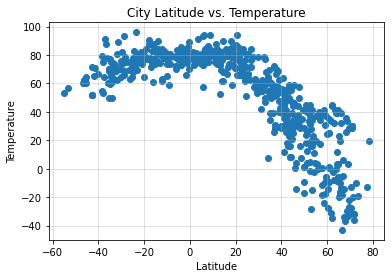

In [18]:
plt.scatter(weather_df["Lat"], weather_df["Temperature"])
plt.title(f"City Latitude vs. Temperature")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid(alpha = 0.5)
plt.savefig("output_data/Latitudevs.Temperature.png")
plt.show

          

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(close=None, block=None)>

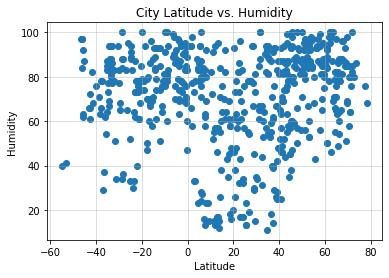

In [19]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"])
plt.title(f"City Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(alpha = 0.5)
plt.savefig("output_data/Latitudevshumidity.png")
plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(close=None, block=None)>

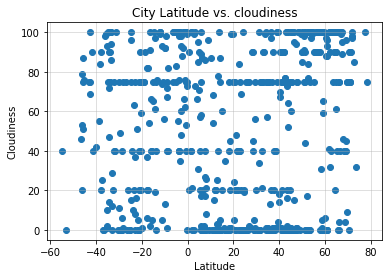

In [20]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"])
plt.title(f"City Latitude vs. cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(alpha = 0.5)
plt.savefig("output_data/Latitudevscloud.png")
plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(close=None, block=None)>

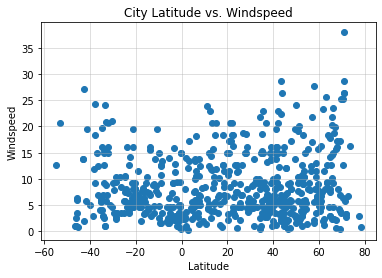

In [21]:
plt.scatter(weather_df["Lat"], weather_df["Windspeed"])
plt.title(f"City Latitude vs. Windspeed")
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.grid(alpha = 0.5)
plt.savefig("output_data/Latitudevswind.png")
plt.show

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [22]:
northern = weather_df.loc[weather_df["Lat"] >= 0]
northern


,City Name,Country,Cloudiness,Lat,Long,Humidity,Windspeed,Temperature
1,Barrow,US,90,71.2906,-156.7887,76,5.75,-20.20
4,Kolokani,ML,100,13.5728,-8.0339,15,8.23,81.81
6,Newport,GB,0,51.5877,-2.9984,88,9.82,41.00
9,Qaanaaq,GL,100,77.4840,-69.3632,76,3.00,-12.95
11,Pandan,PH,87,14.0453,124.1694,84,5.14,76.48
...,...,...,...,...,...,...,...,...
572,Ekhabi,RU,0,53.5102,142.9671,86,10.42,-15.25
573,Tiznit Province,MA,56,29.5833,-9.5000,81,5.39,53.35
575,Umarkot,PK,0,25.3616,69.7362,13,5.48,66.96
576,Tabou,CI,85,4.4230,-7.3528,84,4.14,78.98


In [23]:
southern = weather_df.loc[weather_df["Lat"] < 0]
southern


,City Name,Country,Cloudiness,Lat,Long,Humidity,Windspeed,Temperature
0,Busselton,AU,100,-33.6500,115.3333,88,1.01,64.00
2,Rikitea,PF,37,-23.1203,-134.9692,62,5.39,78.24
3,Lebu,CL,25,-37.6167,-73.6500,78,24.20,64.87
5,Castro,BR,96,-24.7911,-50.0119,91,7.52,68.04
7,Ushuaia,AR,40,-54.8000,-68.3000,40,12.66,53.60
...,...,...,...,...,...,...,...,...
559,Kirakira,SB,56,-10.4544,161.9205,81,7.11,81.39
563,Ondangwa,NA,6,-17.9167,15.9500,50,4.61,77.00
569,Tonantins,BR,60,-2.8731,-67.8022,74,3.02,80.89
570,Kiunga,PG,100,-6.1219,141.2906,98,1.66,72.23


In [24]:
s_latx = southern['Lat']
s_tempy = southern ['Temperature']

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.2976942547373819


<function matplotlib.pyplot.show(close=None, block=None)>

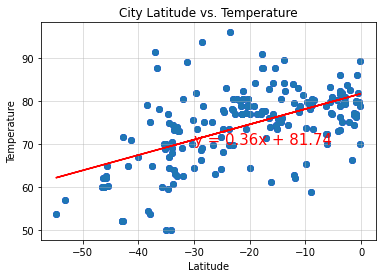

In [28]:
plt.scatter(southern["Lat"], southern["Temperature"], facecolor ="blue")
plt.title(f"City Latitude vs. Temperature")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid(alpha = 0.5)
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_latx, s_tempy)
regress_values = s_latx * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_latx,s_tempy)
plt.plot(s_latx,regress_values,"r-")
plt.annotate(line_eq,(-30,70),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [29]:
n_humidx = northern['Humidity']
n_laty = northern ['Lat']

The r-squared is: 0.10983527896478537


<function matplotlib.pyplot.show(close=None, block=None)>

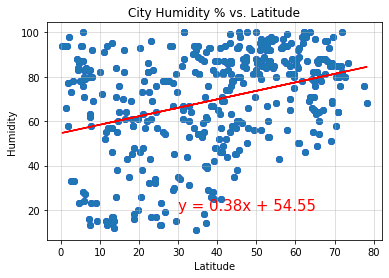

In [30]:
plt.scatter(northern["Lat"], northern["Humidity"], facecolor ="blue")
plt.title(f"City Humidity % vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(alpha = 0.5)
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_laty,n_humidx)
regress_values = n_laty * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_laty,n_humidx,)
plt.plot(n_laty,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [32]:
s_humidx = southern['Lat']
s_humidy = southern['Humidity']

The r-squared is: 0.032375936237296274


<function matplotlib.pyplot.show(close=None, block=None)>

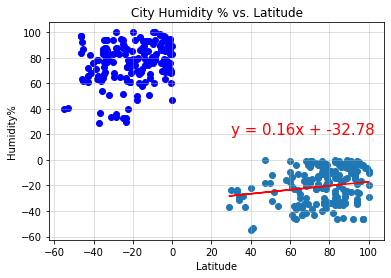

In [33]:
plt.scatter(southern["Lat"], southern["Humidity"], facecolor ="blue")
plt.title(f"City Humidity % vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity%')
plt.grid(alpha = 0.5)
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_humidy,s_humidx)
regress_values = s_humidy * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_humidy,s_humidx,)
plt.plot(s_humidy,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [35]:
n_cloudx = northern['Cloudiness']
n_laty = northern ['Lat']

The r-squared is: 0.09295085803658243


<function matplotlib.pyplot.show(close=None, block=None)>

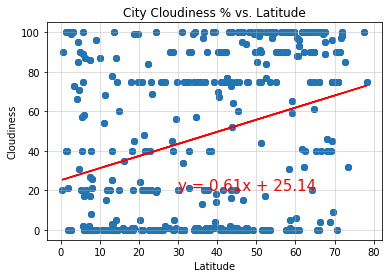

In [36]:
plt.scatter(northern["Lat"], northern["Cloudiness"], facecolor ="blue")
plt.title(f"City Cloudiness % vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(alpha = 0.5)
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_laty,n_cloudx)
regress_values = n_laty * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_laty,n_cloudx,)
plt.plot(n_laty,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [37]:
s_cloudy = southern['Cloudiness']
s_laty = southern ['Lat']

The r-squared is: 0.05415179129334532


<function matplotlib.pyplot.show(close=None, block=None)>

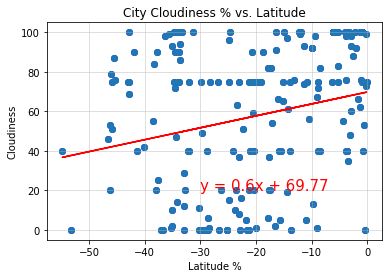

In [47]:
plt.scatter(southern["Lat"], southern["Cloudiness"], facecolor ="blue")
plt.title(f"City Cloudiness % vs. Latitude")
plt.xlabel('Latitude %')
plt.ylabel('Cloudiness')
plt.grid(alpha = 0.5)
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_laty,s_cloudy)
regress_values = s_laty * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_laty,s_cloudy,)
plt.plot(s_laty,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [39]:
n_windx = northern['Windspeed']
n_laty = northern ['Lat']

The r-squared is: 0.014019277190172342


<function matplotlib.pyplot.show(close=None, block=None)>

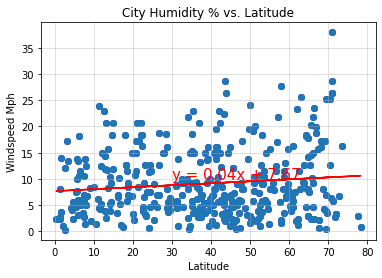

In [40]:
plt.scatter(northern["Lat"], northern["Windspeed"], facecolor ="blue")
plt.title(f"City Humidity % vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Windspeed Mph')
plt.grid(alpha = 0.5)
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_laty,n_windx)
regress_values = n_laty * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_laty,n_windx,)
plt.plot(n_laty,regress_values,"r-")
plt.annotate(line_eq,(30,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [42]:
s_windy = southern['Windspeed']
s_laty = southern ['Lat']

The r-squared is: 0.04972698498870996


<function matplotlib.pyplot.show(close=None, block=None)>

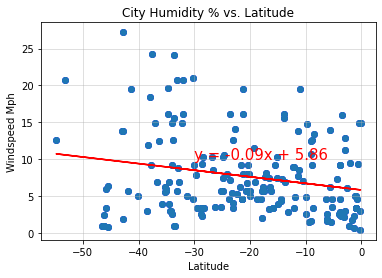

In [43]:
plt.scatter(southern["Lat"], southern["Windspeed"], facecolor ="blue")
plt.title(f"City Humidity % vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Windspeed Mph')
plt.grid(alpha = 0.5)
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_laty,s_windy)
regress_values = s_laty * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_laty,s_windy,)
plt.plot(s_laty,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show

In [ ]:
#The three observable trends are that i) As we move closer to the 0 Latitude line the temperature increases
#ii).  The correlation with the highest R-factor is that of Temperature and latitiude.  
#iii). The lowest correlation is between Humidity and latitude for the Southern Hemisphere